In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salary.csv').dropna()

In [3]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


In [4]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [5]:
y = df['salary']

### I split my data 80/20 to allow for a more accurate prediction when I run my model on the test set. It is not necessary to have a lot of testing data but it is important to have a lot of training data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=25)

In [7]:
model = smf.ols(formula='salary ~ yearsworked + yearsrank + market + position', data=X_train).fit() 
model.params

Intercept      -6022.889386
yearsworked     -354.270402
yearsrank       1042.343698
market         34131.561016
position       10279.204975
dtype: float64

### 1.Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

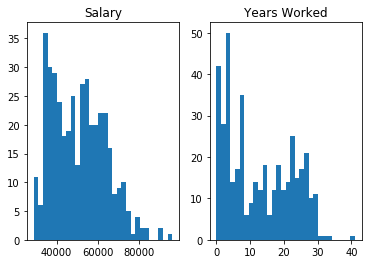

In [8]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.hist(X_train['salary'], bins=30)
plt.title('Salary')

plt.subplot(1, 2, 2)
plt.hist(X_train['yearsworked'], bins=30)
plt.title('Years Worked')

plt.show()

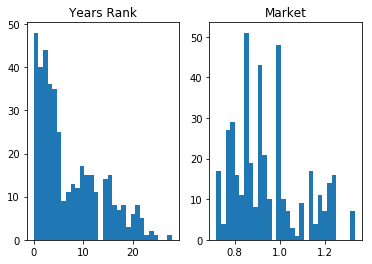

In [9]:
plt.subplot(1, 2, 1)
plt.hist(X_train['yearsrank'], bins=30)
plt.title('Years Rank')

plt.subplot(1, 2, 2)
plt.hist(X_train['market'], bins=30)
plt.title('Market')

plt.show()

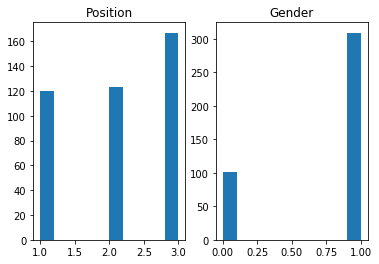

In [10]:
plt.subplot(1, 2, 1)
plt.hist(X_train['position'])
plt.title('Position')

plt.subplot(1, 2, 2)
plt.hist(X_train['male'])
plt.title('Gender')

plt.show()

Text(0.5,1,'Field')

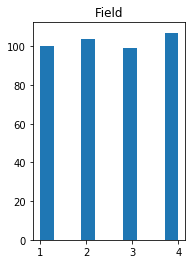

In [11]:
plt.subplot(1, 2, 1)
plt.hist(X_train['Field'])
plt.title('Field')

Text(0.5,1,'salary & year rank')

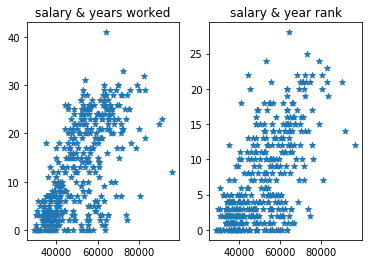

In [12]:
plt.subplot(1,2,1)
plt.scatter(x = X_train['salary'], y= X_train['yearsworked'], marker='*')
plt.title('salary & years worked')

plt.subplot(1,2,2)
plt.scatter(x = X_train['salary'], y= X_train['yearsrank'], marker='*')
plt.title('salary & year rank')

Text(0.5,1,'salary & position')

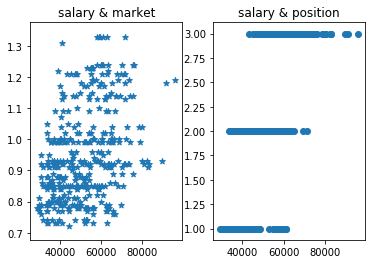

In [13]:
plt.subplot(1,2,1)
plt.scatter(x = X_train['salary'], y= X_train['market'], marker='*')
plt.title('salary & market')

plt.subplot(1,2,2)
plt.scatter(x = X_train['salary'], y= X_train['position'])
plt.title('salary & position')

Text(0.5,1,'salary & field')

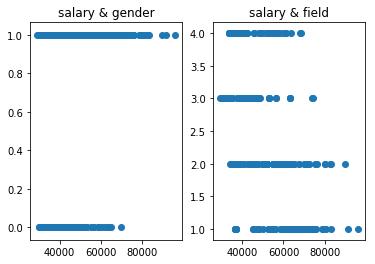

In [14]:
plt.subplot(1,2,1)
plt.scatter(x = X_train['salary'], y= X_train['male'])
plt.title('salary & gender')

plt.subplot(1,2,2)
plt.scatter(x = X_train['salary'], y= X_train['Field'])
plt.title('salary & field')

### 2.One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [33]:
dummies = pd.get_dummies(X_train['Field']).iloc[:, 1:]
dummies.head()

,2,3,4
347,1,0,0
419,1,0,0
48,0,1,0
498,0,0,1
175,1,0,0


### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

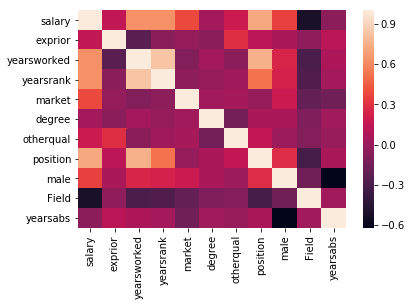

In [17]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### There is no multicollinearity

### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [19]:
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     364.1
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          1.18e-132
Time:                        11:04:49   Log-Likelihood:                -4151.3
No. Observations:                 410   AIC:                             8313.
Df Residuals:                     405   BIC:                             8333.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6022.8894   2103.222     -2.864      

### Years worked, position, years rank, market

### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [20]:
standardized_residuals = model.resid
standardised_predicted_values = model.fittedvalues

print(standardized_residuals.head())
print(standardised_predicted_values.head())

347   -6549.544379
419    1338.998114
48     1771.677196
498   -1309.566586
175    8230.224316
dtype: float64
347    69886.544379
419    33264.001886
48     31908.322804
498    53755.566586
175    48021.775684
dtype: float64


### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

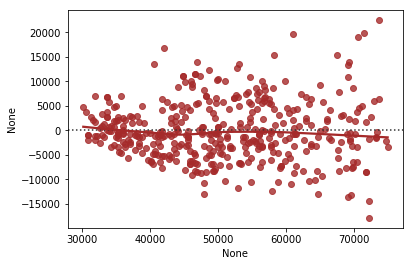

In [21]:
sns.residplot(standardised_predicted_values, standardized_residuals, lowess=True, color="brown")

### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [22]:
test_model = smf.ols(formula='salary ~ yearsworked + yearsrank + market + position', data=X_test).fit() 
test_model.params

Intercept      -7102.468626
yearsworked      -99.631323
yearsrank        744.648351
market         38653.766938
position        7768.364305
dtype: float64

In [30]:
prediction = test_model.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, prediction))
RMSE_train

6358.668980083311

In [29]:
test_predictions = test_model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE_test

5502.412229437346

In [32]:
RMSE_difference = RMSE_train - RMSE_test
RMSE_difference


856.2567506459654

### RMSE for my test set was 5502.412229437346 and 6358.668980083311 for my training set. This is a 856.2567506459654 difference